In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = 'Servo_Mechanism.csv'
df = pd.read_csv(file_path, on_bad_lines='skip')

In [3]:
# 1. Data preview
print("First 5 rows:")
print(df.head(), "\n")

First 5 rows:
  Motor Screw  Pgain  Vgain  Class
0     E     E      5      4      4
1     B     D      6      5     11
2     D     D      4      3      6
3     B     A      3      2     48
4     D     B      6      5      6 



In [4]:
# 2. Data info and missing values
print("DataFrame Info:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum(), "\n")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB

Missing values per column:
Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64 



In [5]:
# 3. Summary statistics for numeric columns
print("Numeric summary statistics:")
print(df.describe(), "\n")

Numeric summary statistics:
            Pgain       Vgain       Class
count  167.000000  167.000000  167.000000
mean     4.155689    2.538922   21.173653
std      1.017770    1.369850   13.908038
min      3.000000    1.000000    1.000000
25%      3.000000    1.000000   10.500000
50%      4.000000    2.000000   18.000000
75%      5.000000    4.000000   33.500000
max      6.000000    5.000000   51.000000 



In [6]:
# 4. Value counts for categorical features
for col in ['Motor', 'Screw']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(), "\n")

Value counts for Motor:
Motor
C    40
B    36
A    36
E    33
D    22
Name: count, dtype: int64 

Value counts for Screw:
Screw
A    42
B    35
C    31
D    30
E    29
Name: count, dtype: int64 



Correlation matrix:
          Pgain     Vgain     Class
Pgain  1.000000  0.812268 -0.687098
Vgain  0.812268  1.000000 -0.391963
Class -0.687098 -0.391963  1.000000 



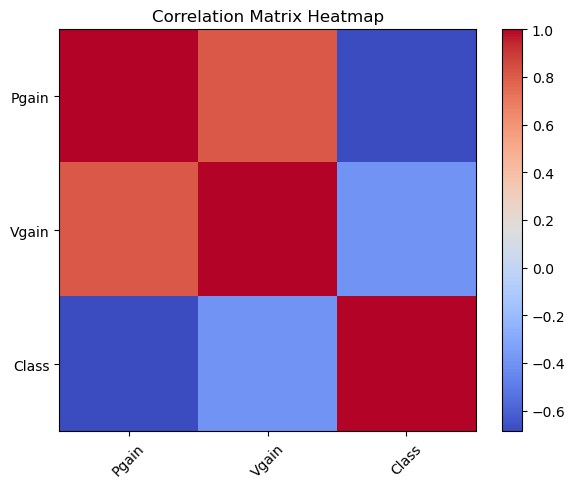

In [11]:
# 5. Correlation matrix and heatmap (numeric columns only)
corr = df.select_dtypes(include=['number']).corr()
print("Correlation matrix:")
print(corr, "\n")

plt.figure(figsize=(6, 5))
plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

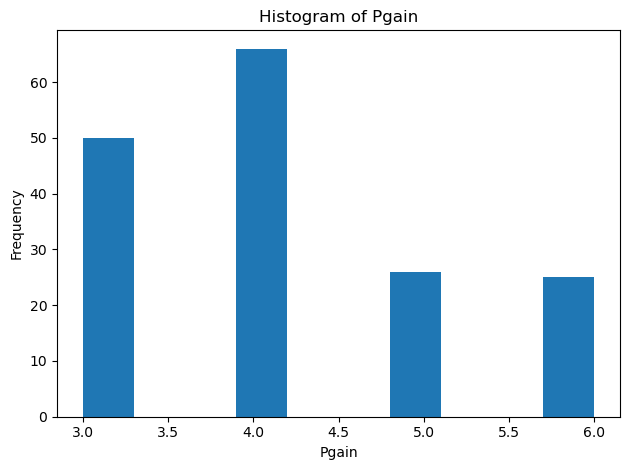

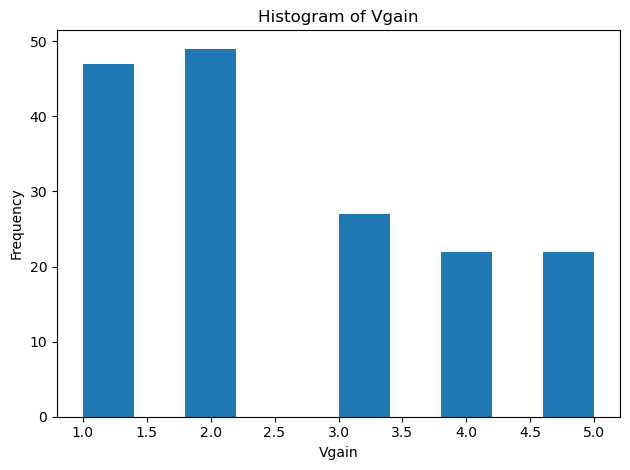

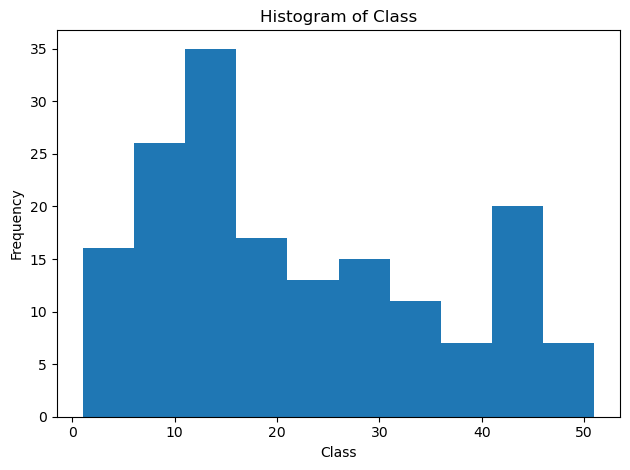

In [8]:
# 6. Histograms for numeric features
numeric_cols = ['Pgain', 'Vgain', 'Class']
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

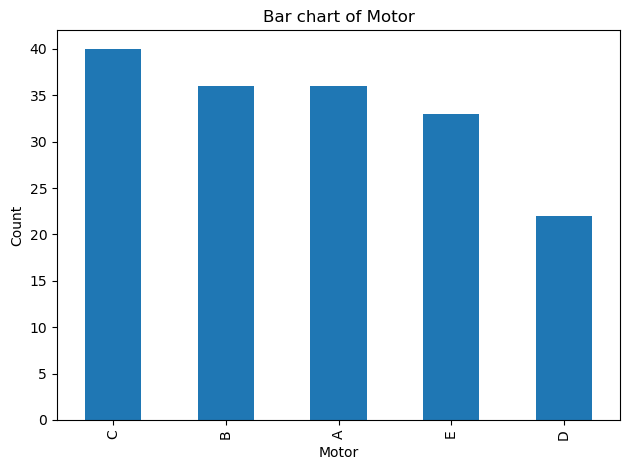

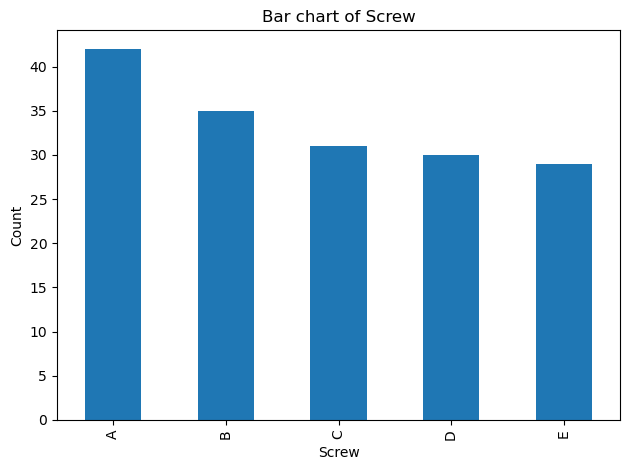

In [9]:
# 7. Bar charts for categorical features
cat_cols = ['Motor', 'Screw']
for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

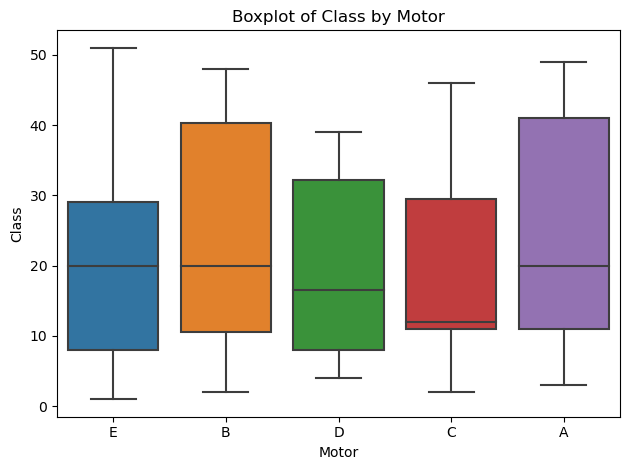

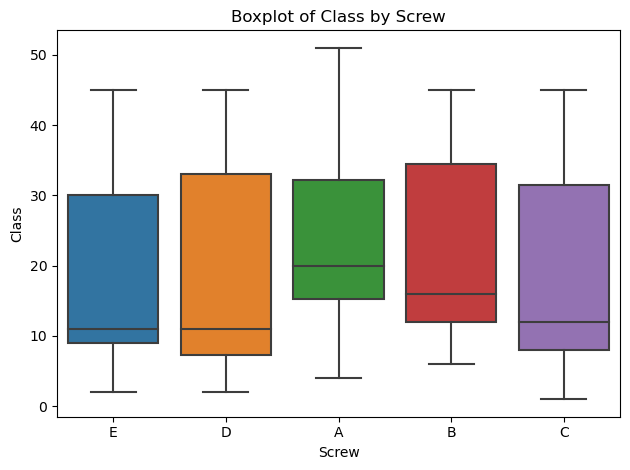

In [14]:
# 8. Boxplots to check distribution of 'Class' across categorical variables
for col in cat_cols:
    plt.figure()
    sns.boxplot(data=df, x=col, y='Class')
    plt.title(f'Boxplot of Class by {col}')
    plt.tight_layout()
    plt.show()

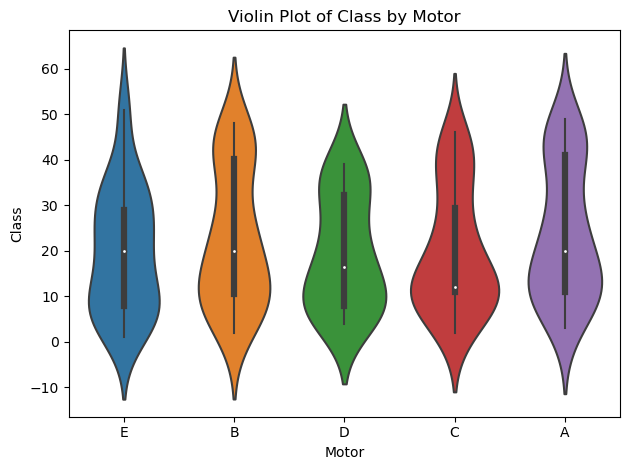

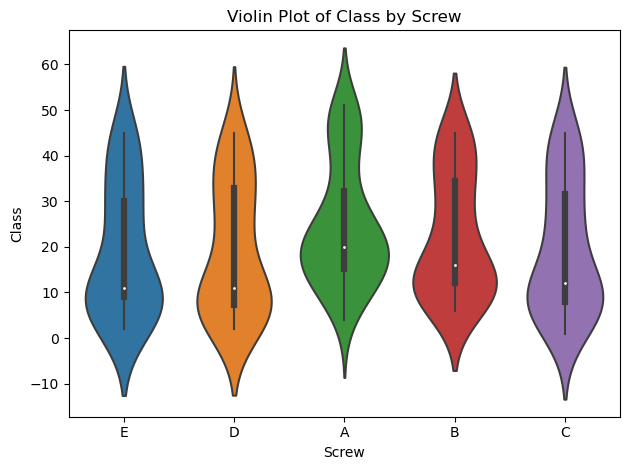

In [15]:
# 9. Violin plots for detailed distribution
for col in cat_cols:
    plt.figure()
    sns.violinplot(data=df, x=col, y='Class')
    plt.title(f'Violin Plot of Class by {col}')
    plt.tight_layout()
    plt.show()

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


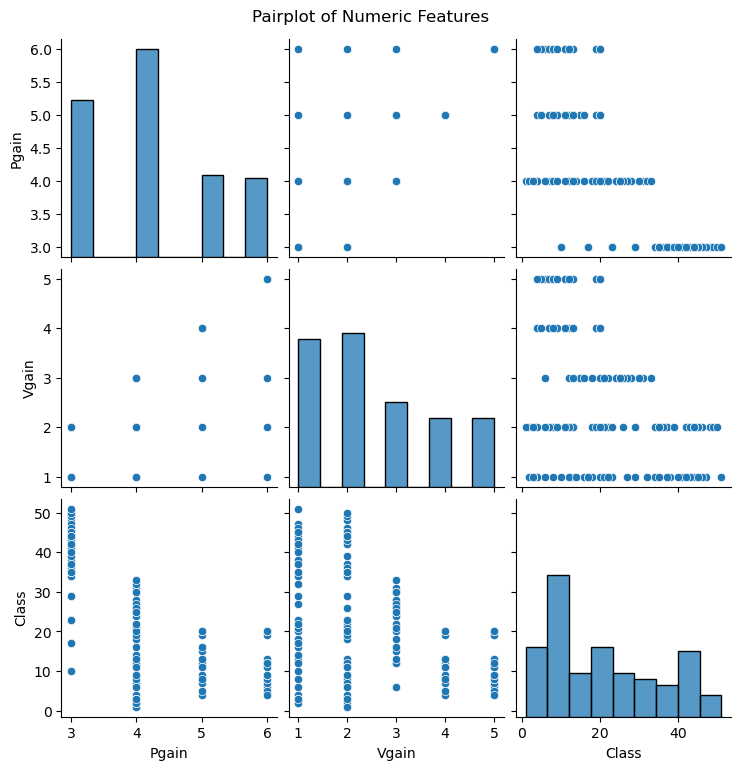

In [16]:
# 10. Pairplot of numeric variables
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

Crosstab of Motor and Screw:
Screw   A  B  C  D  E
Motor                
A       8  7  7  7  7
B       8  7  7  7  7
C      12  7  7  7  7
D       7  7  3  3  2
E       7  7  7  6  6 



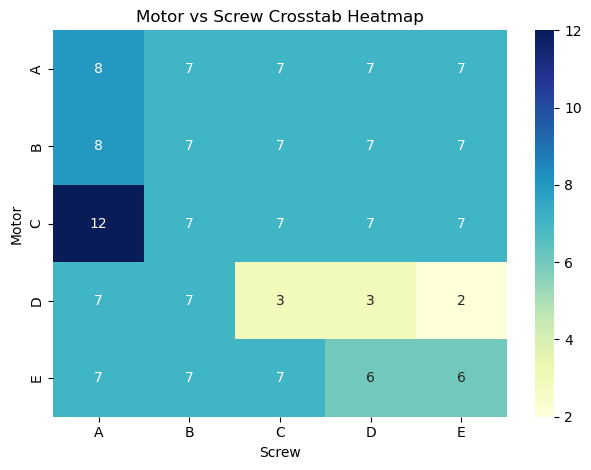

In [17]:
# 11. Crosstab analysis between Motor and Screw
crosstab = pd.crosstab(df['Motor'], df['Screw'])
print("Crosstab of Motor and Screw:")
print(crosstab, "\n")
sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
plt.title("Motor vs Screw Crosstab Heatmap")
plt.tight_layout()
plt.show()